<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday02082022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install circlify
import circlify

import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import random
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm
from matplotlib.lines import Line2D

!pip install adjustText==0.8b2
from adjustText import adjust_text

!pip install colour
import colour
from matplotlib.colors import ListedColormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 2.8 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.6-py3-none-any.whl size=53657 sha256=d737d0595f634814abbbc621ce18b15e6a51bdae295c54e3ba9146ad29ebd134
  Stored in directory: /root/.cache/pip/wheels/c7/c4/c5/775577cac160552091aa601eed39edacb4914ccae337e5955c
Successfully built country-converter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
# Palette from MetBrewer
!wget 'https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py'
import palettes as met

--2022-08-03 19:57:58--  https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py [following]
--2022-08-03 19:57:58--  https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11849 (12K) [text/plain]
Saving to: ‘palettes.py’

palettes.py         100%[===================>]  11.57K  --.-KB/s    in 0s      

2022-08-03 19:57:58 (49.9 MB/s) - ‘palettes.py’ saved [11849/11849]



In [2]:
# Font
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir', weight='medium')

--2022-08-03 17:55:28--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-08-03 17:55:29--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc’

Avenir.ttc          100%[===================>]   1.56M  --.-KB/s    in 0.07s   

2022-08-03 17:55:30 (23.5 MB/s) - ‘Avenir.ttc’ saved [1639536/1639536]

/content/Avenir.ttc


In [141]:
# Data

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/\
tidytuesday/master/data/2022/2022-08-02/frogs.csv')

df['Water'] = df.Water.apply(lambda x : re.sub(' ', '\n', x))
df.Structure = df.Structure.apply(lambda x : re.sub(' ', '\n', x))

df = df.groupby(['Subsite',
                 'Structure',
                 'Water',
                 ]).count()['Frequency']

# Dictify
'''
dfdict = dict()                 
for m in df.index.levels[0]:
  mdict = dict()
  for l in df.index.levels[1]:
    try:
      mdict[l] = df.xs(m).xs(l).to_dict()
    except KeyError:
      pass
  dfdict[m] = mdict
'''

data = []
for m in df.index.levels[0]:
  mdict = dict()
  mdict['id'] = m
  mdict['datum'] = df[m].sum()
  childrenlist = []
  for l in df.index.levels[1]:
    ldict = dict()
    try:
      ldict['datum'] = df[m][l].sum()
      ldict['id'] = l
    except KeyError:
      pass
    grandchildrenlist = []
    for k in df.index.levels[2]:
      kdict = dict()
      try:
        kdict['datum'] = df[m][l][k]#.sum
        kdict['id'] = k
      except KeyError:
        pass
        #kdict['id'] = k
        #kdict['datum'] = 0
      # no more children here!
      if kdict != {}:
        grandchildrenlist.append(kdict)
    if grandchildrenlist != []:
      ldict['children'] = grandchildrenlist
    if ldict != {}:
      childrenlist.append(ldict)
  if childrenlist != []:
    mdict['children'] = childrenlist
  data.append(mdict)

data

[{'children': [{'children': [{'datum': 1, 'id': 'No\nwater'},
     {'datum': 6, 'id': 'Shallow\nwater'}],
    'datum': 7,
    'id': 'Herbaceous\nveg'},
   {'children': [{'datum': 1, 'id': 'Shallow\nwater'}],
    'datum': 1,
    'id': 'Open'},
   {'children': [{'datum': 2, 'id': 'Deep\nwater'},
     {'datum': 1, 'id': 'No\nwater'},
     {'datum': 3, 'id': 'Unknown\nwater'}],
    'datum': 6,
    'id': 'Woody\ndebris'}],
  'datum': 14,
  'id': 'Cow Camp Pond'},
 {'children': [{'children': [{'datum': 4, 'id': 'Deep\nwater'},
     {'datum': 4, 'id': 'No\nwater'},
     {'datum': 13, 'id': 'Shallow\nwater'},
     {'datum': 2, 'id': 'Unknown\nwater'}],
    'datum': 23,
    'id': 'Herbaceous\nveg'},
   {'children': [{'datum': 1, 'id': 'Unknown\nwater'}],
    'datum': 1,
    'id': 'Leaf\nlitter'},
   {'children': [{'datum': 3, 'id': 'Deep\nwater'},
     {'datum': 5, 'id': 'Shallow\nwater'}],
    'datum': 8,
    'id': 'Open'},
   {'children': [{'datum': 3, 'id': 'Shallow\nwater'},
     {'datum': 

In [81]:
df#['Cow Camp Pond']['Herbaceous veg']['No water']

Subsite         Structure       Water        
Cow Camp Pond   Herbaceous veg  No water          1
                                Shallow water     6
                Open            Shallow water     1
                Woody debris    Deep water        2
                                No water          1
                                Unknown water     3
Cow Camp River  Herbaceous veg  Deep water        4
                                No water          4
                                Shallow water    13
                                Unknown water     2
                Leaf litter     Unknown water     1
                Open            Deep water        3
                                Shallow water     5
                Woody debris    Shallow water     3
                                Unknown water     1
                Woody veg       Shallow water     1
                                Unknown water     1
N Res           Herbaceous veg  No water          2
                  

In [142]:
circles = circlify.circlify(data,
                            target_enclosure=circlify.Circle(x=0, y=0, r=1)
                            )

#circles

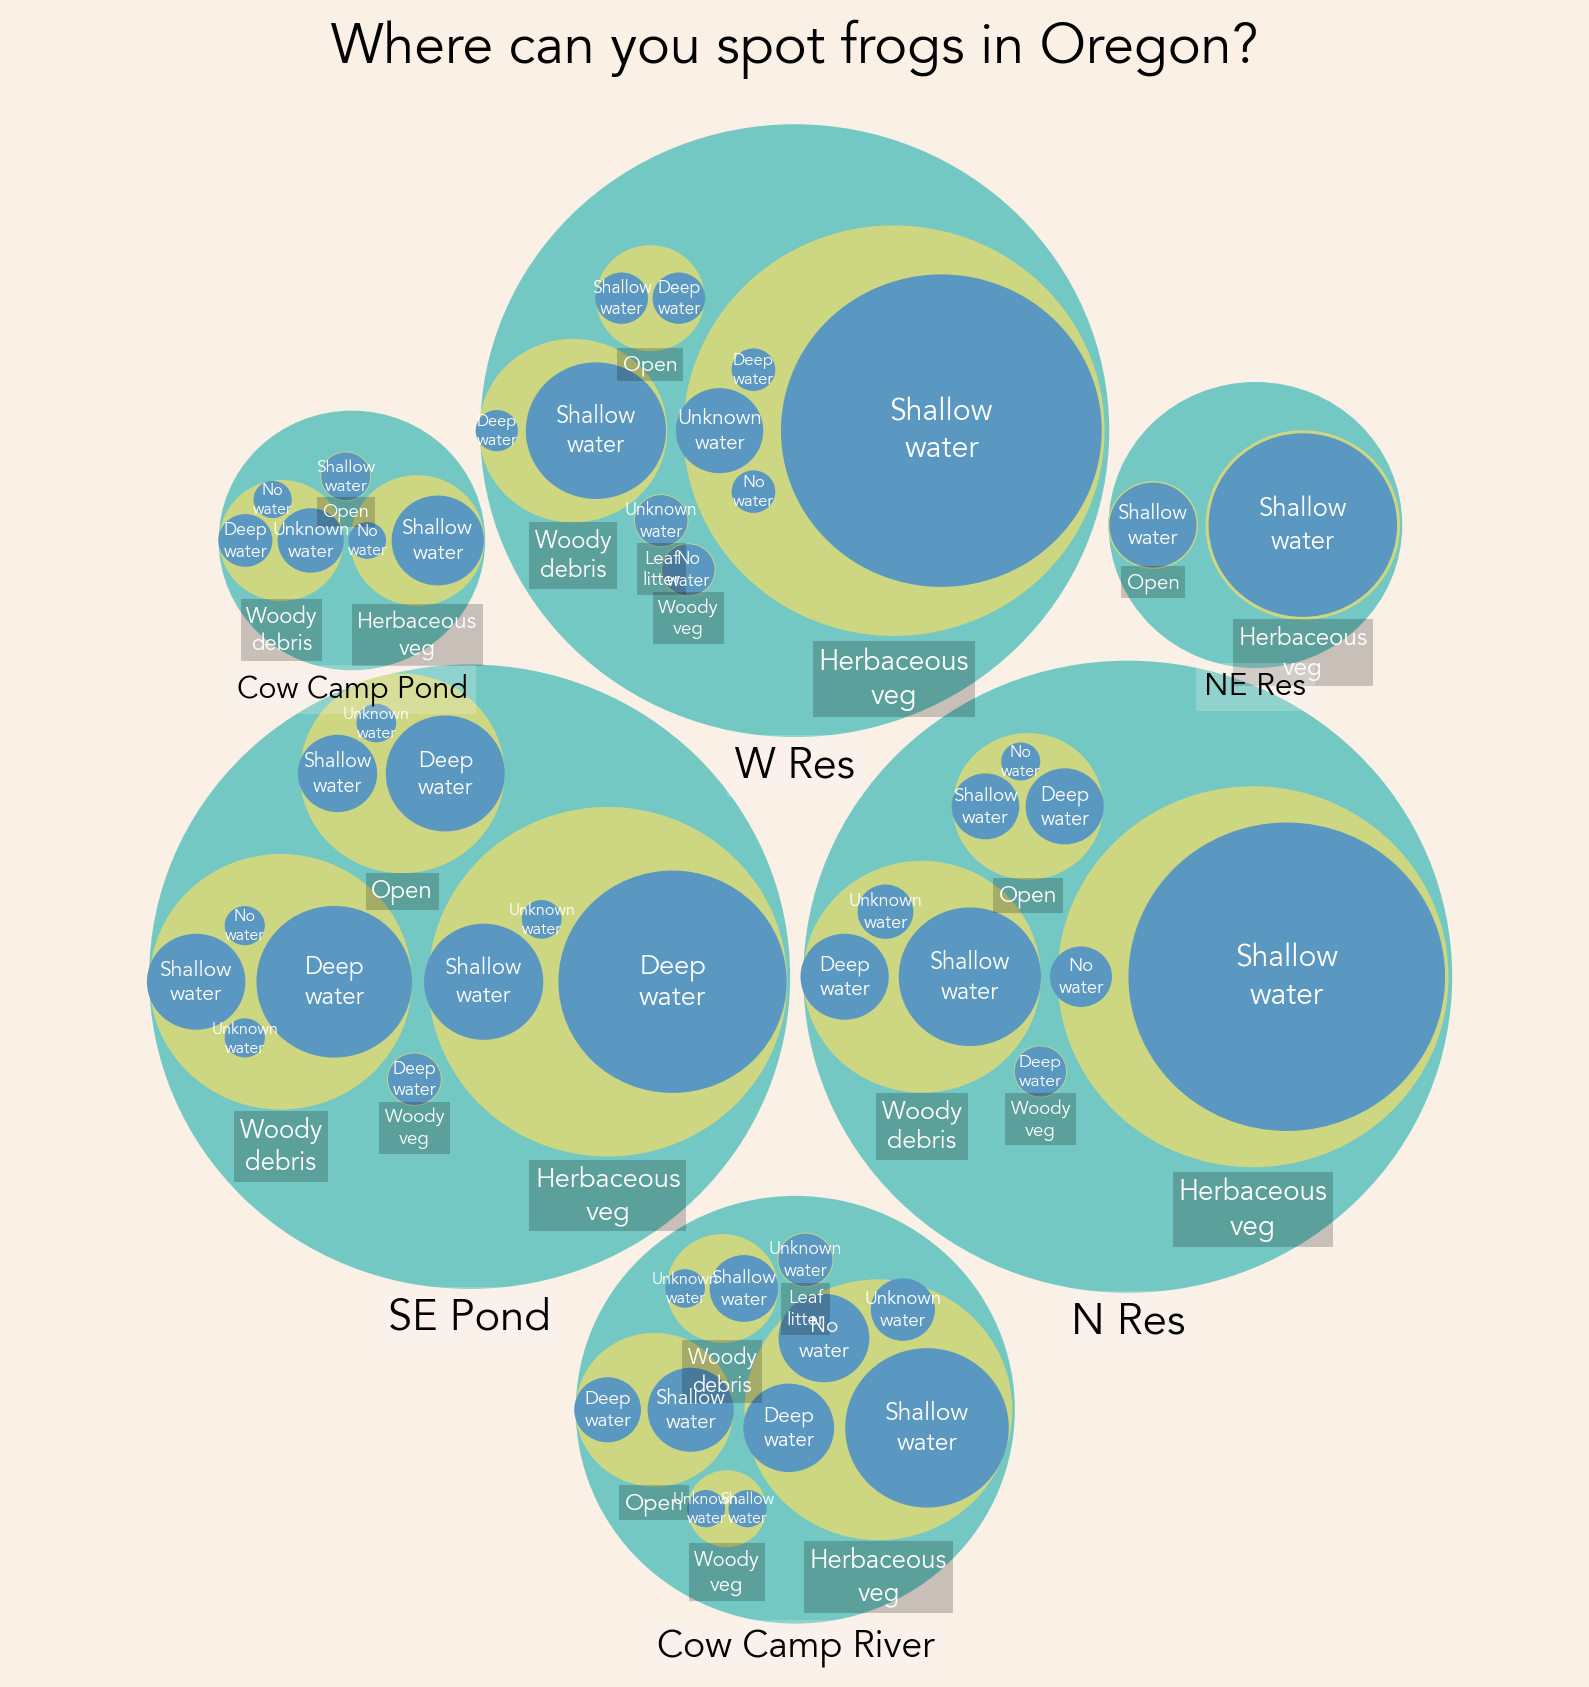

In [182]:
# Init random selector
random.seed(47)


# Create subplot
fig, ax = plt.subplots(figsize=(10,10),
                       dpi=200,
                       facecolor='linen',
                       )

# Cmap
colorlist = met.met_brew(name="Hokusai3", 
                      #n=len(dfd.columns), 
                      n=6,
                      brew_type="continuous")#[3:]

snslist = sns.color_palette(colorlist[:])

cmap = ListedColormap(sns.color_palette(colorlist[:]).as_hex())


# Title
ax.set_title('Where can you spot frogs in Oregon?',
             fontdict={'fontsize':20}, pad=20)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)


# Print circles
textlist = []

choice = random.choice(colorlist)
for circle in circles:
    if circle.level == 1:
      x, y, r = circle
      ax.add_patch(plt.Circle((x, y), r * 0.98, 
                              alpha=1,
                              linewidth=0, 
                              color=choice#"#69b3a2"
                              ))

choice = random.choice(colorlist)    
for circle in circles:
    if circle.level == 2:
      x, y, r = circle
      ax.add_patch( plt.Circle((x, y), r * 0.95, 
                              alpha=.9, 
                              linewidth=0,
                              #edgecolor='k',
                              facecolor=choice
                              ))
      label = circle.ex["id"]
      txt = plt.annotate(label, (x, y - r), 
                  ha='center', 
                  va='top',
                  color="white",
                  fontsize=13 * (r ** 0.2),
                  bbox=dict(facecolor=(0,0,0,0.2), 
                            edgecolor=(1,1,1,0), 
                            pad=2))
      textlist.append(txt)

choice = random.choice(colorlist)
for circle in circles:
    if circle.level == 3:
      x, y, r = circle
      ax.add_patch(plt.Circle((x, y), r * 0.92, 
                              alpha=1, 
                              linewidth=0, 
                              color=choice
                              ))
      label = circle.ex["id"]
      txt = plt.annotate(label, (x, y), 
                  ha='center', 
                  va='center',
                  color="white",
                  fontsize=17 * (r ** 0.3))
      #textlist.append(txt)

    

# Print labels
for circle in circles:
    if circle.level == 1:
      #upd = random.choice([1.1, -1.1])
      x, y, r = circle
      label = circle.ex["id"]
      txt = plt.annotate(label, (x - 0 * r, y - r) ,
                  va='top', ha='center', 
                  fontsize=22 * (r ** 0.4),
                  bbox=dict(facecolor=(1, 1, 1, 0.2), 
                            edgecolor=(1,1,1,0), 
                            pad=3),)
      textlist.append(txt)


# Adjust labels
#adjust_text(textlist, 
            #arrowprops=dict(arrowstyle='->', color=(1,1,1,0.5))
           #)

plt.savefig('frogs.svg')
plt.savefig('frogs.png', dpi=300)
plt.show()